<b>Question 1 :</b>

In [1]:
import pandas as pd

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

In [2]:
#step4: Mean age per occupation
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [3]:
#step5: Male ratio per occupation
users['male_count'] = users['gender'].apply(lambda x: 1 if x=='M' else 0) 
MaleRatio = users.groupby('occupation').male_count.sum() / users.groupby('occupation').gender.count()
MaleRatio.sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [4]:
#step6 : Minimum and Maximum ages as per occupation
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [5]:
#step7: Mean age as per occupation and sex
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

----------------------------------------------------------------------------------------------
<b>Question 2: </b>

In [6]:
import pandas as pd
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [7]:
#Step4: Select the only goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [8]:
#Step5: How many teams participated in Euro2012
print("Number of teams participated in Euro12: ",euro12.Team.count())

Number of teams participated in Euro12:  16


In [9]:
#Step6: Number of Columns
print("Number of Column in dataset is: ", len(euro12.columns))

Number of Column in dataset is:  35


In [10]:
#Step7: Creating dataframe with three column : team, yellow card and Red cards
discipline = pd.DataFrame({'Team':euro12['Team'], 'Yellow Cards':euro12['Yellow Cards'], 'Red Cards':euro12['Red Cards']})
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [11]:
#Step8: Sorting the team by Red card and then by Yellow card
discipline.sort_values(['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [12]:
#Step9: Mean Yellow cards
mean = discipline['Yellow Cards'].mean()
print("Mean of Yellow cards: ", mean)

Mean of Yellow cards:  7.4375


In [13]:
#Step10: Filter teams that scored more than 6 goals
filtered_euro12 = euro12.loc[euro12.Goals>6]
filtered_euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [14]:
#Step11: Select the team that starts with G
euro12.loc[euro12['Team'].str.match('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [15]:
#Step12: Select the first 7 columns
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [16]:
#Step13: Select all columns except last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [17]:
#Step14:  Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12['Team'].isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


----------------------------------------------------------------------------------------------
<b>Question 3: </b>

In [18]:
import pandas as pd
import numpy as np
#Step2: 
#a: random series from number 1 to 4
series1 = pd.Series(np.random.randint(1,5,size=100))
#b: random series from number 1 to 3
series2 = pd.Series(np.random.randint(1,4,size=100))
#c: random series from number 10,000 to 30,000
series3 = pd.Series(np.random.randint(10000,30001,size=100))

#Step3: Dataframe by joining these 3 series
df = pd.DataFrame({'Series1':series1, 'Series2':series2, 'Series3':series3})
df

,Series1,Series2,Series3
0,3,2,15729
1,1,2,17503
2,4,2,15572
3,2,1,26821
4,2,3,15401
...,...,...,...
95,2,3,22307
96,1,2,20215
97,4,2,22138
98,4,1,28812


In [19]:
#Step4: changing the column name
df.rename(columns = {'Series1':'bedrs', 'Series2':'bathrs', 'Series3':'price_sqr_meter'}, inplace = True)
df

,bedrs,bathrs,price_sqr_meter
0,3,2,15729
1,1,2,17503
2,4,2,15572
3,2,1,26821
4,2,3,15401
...,...,...,...
95,2,3,22307
96,1,2,20215
97,4,2,22138
98,4,1,28812


In [20]:
#Step5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3]).to_frame()
bigcolumn

,0
0,3
1,1
2,4
3,2
4,2
...,...
95,22307
96,20215
97,22138
98,28812


In [21]:
#Step7: Reindex the dataframe
bigcolumn.reset_index()

,index,0
0,0,3
1,1,1
2,2,4
3,3,2
4,4,2
...,...,...
295,95,22307
296,96,20215
297,97,22138
298,98,28812


----------------------------------------------------------------------------------------------
<b>Question 4: </b>

In [22]:
import pandas as pd
import datetime

#References:
#https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
#https://cmdlinetips.com/2021/02/combine-year-month-and-day-columns-to-single-date-in-pandas/
data = pd.read_csv('wind.txt', sep = "\s+", parse_dates = {"date" : ["Yr","Mo","Dy"]}) 
data

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [23]:
#Step4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it
def fixYear(x):
    if x.year > 1978:
        year = x.year-100
    else:
        year = x.year
    return datetime.date(year, x.month, x.day)

data['date'] = data['date'].apply(fixYear)
data

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [24]:
#Step5: 
data["date"] = pd.to_datetime(data["date"])
data = data.set_index('date')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [25]:
#Step6: Checking null value
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [26]:
data.dropna()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [28]:
#Step7: checking not null values
data.notna().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [29]:
total = data.notna().sum().sum()
print('Total non-missing value: ', total)

Total non-missing value:  78857


In [30]:
#Step8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#Reference:
#https://stackoverflow.com/questions/25140998/pandas-compute-mean-or-std-standard-deviation-over-entire-dataframe
data.stack().mean()

10.22788376428219

In [31]:
#Step9: Calculate min, max, mean and std for all the location
loc_stats = data.agg(['min','max','mean','std'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [32]:
#Step10: Calculate min, max, mean and std at each day
min = data.min(axis=1)
max = data.max(axis=1)
mean = data.mean(axis=1)
standard_deviations = data.std(axis=1)
day_stats = pd.DataFrame({'Min':min, 'Max':max, 'Mean':mean, 'Standard Deviation':standard_deviations})
day_stats

,Min,Max,Mean,Standard Deviation
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [33]:
#Step11: Calculating Average Windspeed for January month
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [34]:
#Step12: Downsample the record to a yearly frequency for each location
data.resample('Y').count()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-12-31,360,362,363,361,363,365,362,363,362,364,365,362
1962-12-31,364,365,365,364,365,365,365,365,365,365,365,364
1963-12-31,365,365,365,365,365,365,365,365,365,365,365,365
1964-12-31,366,366,366,366,366,366,366,366,366,366,366,366
1965-12-31,365,365,365,365,365,365,365,365,365,365,365,365
1966-12-31,365,365,365,365,365,365,365,365,365,365,365,365
1967-12-31,365,365,365,365,365,365,365,365,365,365,365,365
1968-12-31,366,366,366,366,366,366,366,366,366,366,366,366
1969-12-31,365,365,365,365,365,365,365,365,365,365,365,365


In [35]:
#Step13: Downsample the record to a monthly frequency for each location.
data.resample('M').count()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-31,30,30,31,31,29,31,31,30,31,31,31,31
1961-02-28,28,28,27,27,28,28,28,28,28,28,28,28
1961-03-31,30,31,31,30,31,31,31,31,29,31,31,30
1961-04-30,30,30,30,30,30,30,30,30,30,30,30,30
1961-05-31,31,30,31,30,31,31,30,31,31,31,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,31,31,31,31,31,31,31,31,31,31,31,31
1978-09-30,30,30,30,30,30,30,30,30,30,30,30,30
1978-10-31,31,31,31,31,31,31,31,31,31,31,31,31


In [36]:
#Step14: Downsample the record to a weekly frequency for each location.
data.resample('W').count()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,1,1,1,1,0,1,1,1,1,1,1,1
1961-01-08,7,6,7,7,7,7,7,6,7,7,7,7
1961-01-15,7,7,7,7,7,7,7,7,7,7,7,7
1961-01-22,7,7,7,7,6,7,7,7,7,7,7,7
1961-01-29,6,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,7,7,7,7,7,7,7,7,7,7,7,7
1978-12-10,7,7,7,7,7,7,7,7,7,7,7,7
1978-12-17,7,7,7,7,7,7,7,7,7,7,7,7


----------------------------------------------------------------------------------------------
<b>Question 5: </b>

In [37]:
import pandas as pd
import numpy as np
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
#Step4: First 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [38]:
#Step5: Number of Observations
count = chipo.order_id.count()
print('Number of Observations: ',count)

Number of Observations:  4622


In [39]:
#Step6: Number of coloumn
count_column = len(chipo.columns)
print('Number of Column: ',count_column)

Number of Column:  5


In [40]:
#Step7: Print names of all columns
for column in chipo.columns:
    print(column)

order_id
quantity
item_name
choice_description
item_price


In [41]:
#Step8: How dataset is indexed
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [42]:
#Step9: Which was the most ordered item
mostOrderedItem = chipo.groupby('item_name').order_id.count()
mostOrderedItem.sort_values(ascending = False).head(1)

item_name
Chicken Bowl    726
Name: order_id, dtype: int64

In [43]:
#Step10 --> Chicken Bowl was ordered 726 times

In [44]:
#Step11: 
mostOrderedItem = chipo.groupby('choice_description').order_id.count()
mostOrderedItem.sort_values(ascending = False).head(1)

choice_description
[Diet Coke]    134
Name: order_id, dtype: int64

In [45]:
#Step12:  How many items were orderd in total?
total_order = chipo.quantity.sum()
total_order

4972

In [46]:
#step13:
#checking datatype of price column
chipo['item_price'].dtype

dtype('O')

In [47]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))
chipo['item_price'].dtype

dtype('float64')

In [48]:
#Step14: total revenue
total_revenue = chipo.item_price.sum()
print('Total Revenue: ', total_revenue)

Total Revenue:  34500.16


In [49]:
#Step15: Total Orders
total_orders = len(pd.unique(chipo['order_id']))
print('Total Number of Orders: ',total_orders)

Total Number of Orders:  1834


In [50]:
#Step16: Average revenue per order
chipo.groupby('order_id').item_price.mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [51]:
#Step17: How many different items were sold
total_items = len(pd.unique(chipo['item_name']))
print('Total Number of Items sold: ',total_items)

Total Number of Items sold:  50


----------------------------------------------------------------------------------------------
<b>Question 6: </b>

Text(0.5, 0, 'Year')

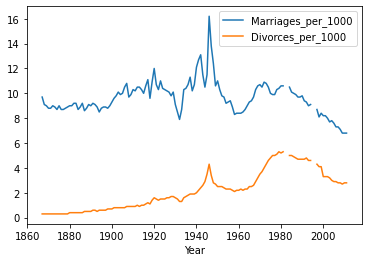

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

US_marrige_divorce = pd.read_csv('us-marriages-divorces-1867-2014.csv')

columns = US_marrige_divorce.columns.drop(['Year', 'Marriages', 'Divorces', 'Population'])

x_data = US_marrige_divorce['Year'].values

fig, ax = plt.subplots()

for column in columns:
    ax.plot(x_data, US_marrige_divorce[column])
    
ax.legend(columns)
ax.set_xlabel('Year')

----------------------------------------------------------------------------------------------
<b>Question 7: </b>

Text(0.5, 0, 'Year')

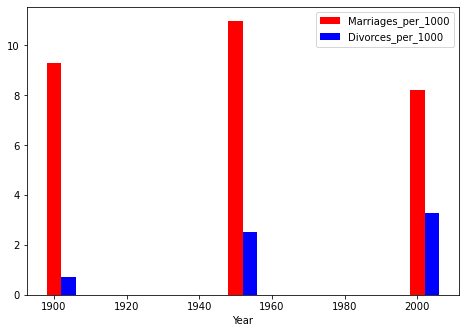

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

US_marrige_divorce = pd.read_csv('us-marriages-divorces-1867-2014.csv')

US_marrige_divorce = US_marrige_divorce[US_marrige_divorce['Year'].apply(lambda x: x in [1900, 1950, 2000])]

x_data = US_marrige_divorce['Year'].values

#Reference: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x_data+0.00, US_marrige_divorce['Marriages_per_1000'], color='r', width = 4)
ax.bar(x_data+4, US_marrige_divorce['Divorces_per_1000'], color='b', width = 4)

ax.legend(labels=['Marriages_per_1000', 'Divorces_per_1000'])
ax.set_xlabel('Year')

----------------------------------------------------------------------------------------------
<b>Question 8: </b>

Text(0, 0.5, 'Actor Name')

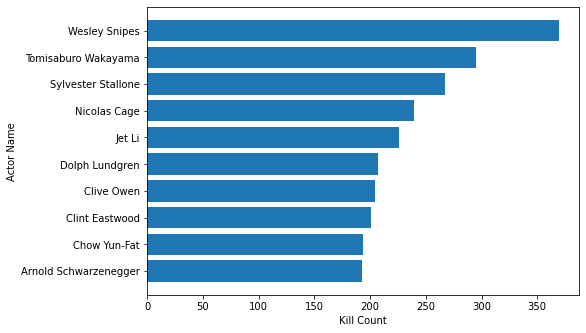

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

actor_dataset = pd.read_csv('actor_kill_counts.csv')

y_data = actor_dataset['Actor'].values
X_data = actor_dataset['Count'].values
sorting = actor_dataset.sort_values('Count')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.barh(y_data, sorted(X_data))

ax.set_xlabel('Kill Count')
ax.set_ylabel('Actor Name')

----------------------------------------------------------------------------------------------
<b>Question 9: </b>

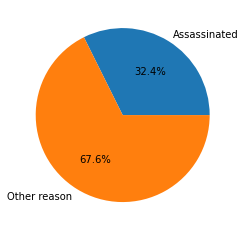

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

romanemperor = pd.read_csv('roman-emperor-reigns.csv')

assassinated_emperors = romanemperor[
    romanemperor['Cause_of_Death'].apply(lambda x: 'Assassinated' in x)]

no_assassinated = len(assassinated_emperors)

rest = len(romanemperor) - no_assassinated

data = []
data.append(no_assassinated)
data.append(rest)

label = ['Assassinated', 'Other reason']

plt.pie(data, labels=label, autopct='%1.1f%%')
plt.show()

----------------------------------------------------------------------------------------------
<b>Question 10: </b>

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

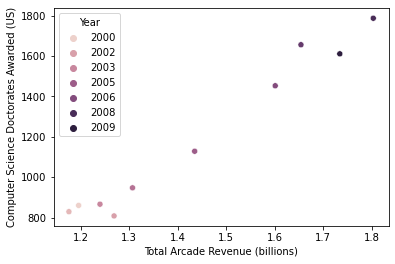

In [56]:
import seaborn as sns
import pandas as pd

arcade = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', data=arcade)